In [203]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
#!pip install sklearn

#Importing the packages needed for visuals and analysis

import pandas as pd
import seaborn as sns
import numpy as np
import sklearn as sk

import matplotlib.pyplot as plt
import sqlite3

In [2]:
#Importing the data from csv files for the QB, RB, and WR positions

qbdata = pd.read_csv(r'qb_stats_and_projections.csv')
qbdf = pd.DataFrame(qbdata)

rbdata = pd.read_csv(r'rb_stats_and_projections.csv')
rbdf = pd.DataFrame(rbdata)

wrdata = pd.read_csv(r'wr_stats_and_projections.csv')
wrdf = pd.DataFrame(wrdata)

rbdf




,Unnamed: 0,PLAYER NAME,TEAM NAME,PLAYER POSITION,2019 CAR,2019 RUSH YDS,2019 RUSH AVG,2019 RUSH TD,2019 REC,2019 REC YDS,...,2019 FPTS,2020 CAR,2020 RUSH YARDS,2020 RUSH AVG,2020 RUSH TD,2020 REC,2020 REC YDS,2020 REC TD,2020 FPTS,Player OUTLOOK
0,1,Christian McCaffrey,Panthers,RB,287.0,1387.0,4.8,15.0,116.0,1005.0,...,471.20,233.0,1048.0,4.5,9.0,90.0,736.0,3.0,333.95,McCaffrey returns as the feature back in Carol...
1,2,Ezekiel Elliott,Cowboys,RB,301.0,1357.0,4.5,12.0,54.0,420.0,...,311.70,282.0,1244.0,4.4,10.0,57.0,455.0,2.0,300.76,Elliott returns as the clear feature back in D...
2,3,Saquon Barkley,Giants,RB,217.0,1003.0,4.6,6.0,52.0,438.0,...,244.10,261.0,1176.0,4.5,10.0,57.0,458.0,3.0,292.33,Barkley's 2019 season fell short of lofty expe...
3,4,Dalvin Cook,Vikings,RB,250.0,1135.0,4.5,13.0,53.0,519.0,...,292.40,245.0,1051.0,4.3,10.0,64.0,536.0,1.0,291.72,Cook's career has thus far been marred by inju...
4,5,Alvin Kamara,Saints,RB,171.0,797.0,4.7,5.0,81.0,533.0,...,248.52,194.0,876.0,4.5,8.0,78.0,600.0,3.0,290.39,Kamara is coming off an up-and-down 2019 campa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,251,Marshawn Lynch,FA,RB,12.0,34.0,2.8,1.0,0.0,0.0,...,9.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,No outlook available.
251,252,Darren Sproles,Eagles,RB,17.0,66.0,3.9,0.0,6.0,24.0,...,17.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,No outlook available.
252,253,LeSean McCoy,FA,RB,101.0,465.0,4.6,4.0,28.0,181.0,...,118.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,No outlook available.
253,254,Alex Barnes,Titans,RB,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,No outlook available.


In [3]:
    #Drops unnecessary columns that are categorical and don't relate to the question being solved   
    
    qbclean = qbdf.drop(['Unnamed: 0', 'TEAM NAME', 'PLAYER POSITION', '2020 OUTLOOK'], axis=1)
    #print(qbclean)
    
    
    rbclean = rbdf.drop(['Unnamed: 0', 'TEAM NAME', 'PLAYER POSITION', 'Player OUTLOOK'], axis=1)
    #print(rbclean)
    
    
    wrclean = wrdf.drop(['Unnamed: 0', 'TEAM', 'POSITION', '2020 PLAYER OUTLOOK'], axis=1)
    #print(wrclean)

In [4]:
    #Drops rows that have Null values
    qbclean = qbclean.dropna()
    print(qbclean)
    
    rbclean = rbclean.dropna()
    #print(rbclean)
    
    wrclean = wrclean.dropna()
    #wrclean

           PLAYER NAME  2019 COMPLETED PASS  2019 ATTEMPTED PASS  \
0        Lamar Jackson                265.0                401.0   
1      Patrick Mahomes                319.0                484.0   
2       Deshaun Watson                333.0                495.0   
3         Dak Prescott                388.0                596.0   
4       Russell Wilson                341.0                516.0   
5         Kyler Murray                349.0                542.0   
6            Tom Brady                373.0                613.0   
7            Matt Ryan                408.0                616.0   
8     Matthew Stafford                187.0                291.0   
9         Carson Wentz                388.0                607.0   
10          Drew Brees                281.0                378.0   
11          Josh Allen                271.0                461.0   
12       Aaron Rodgers                353.0                569.0   
13        Daniel Jones                284.0     

In [5]:
    #Removes rows that are all zeros
    
    qbclean = qbclean.loc[~(qbclean==0).any(axis=1)]
    #print(qbclean)
    qbclean = qbclean.drop([10,24,32,34])
    #print(qbclean)
    
    rbclean = rbclean.loc[~(rbclean==0).any(axis=1)]
    rbclean = rbclean.drop([13,14,17,29,32,34,41,42,46,48,50,52,60,61])
    #print(rbclean)
    
    wrclean = wrclean.loc[~(wrclean==0).all(axis=1)]
    #wrclean

In [6]:
    #Gives descriptive statistics of the data
    
    qbcleandes = qbclean.describe()
    
    
    rbcleandes = rbclean.describe()
    #print(rbcleandes)
    
    wrcleandes = wrclean.describe()
    #print(wrcleandes)
    
    qbcleandes

,2019 COMPLETED PASS,2019 ATTEMPTED PASS,2019 PASSING YDS,2019 PASSING TD,2019 INT,2019 CAR,2019 RUSH YDS,2019 RUSH TD,2019 FPTS,2020 COMPLETED PASS,2020 ATTEMPTED PASS,2020 PASSING YDS,2020 PASSING TD,2020 INT,2020 CAR,2020 RUSH YDS,2020 RUSH TD,2020 FPTS
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,332.277778,513.222222,3848.111111,25.333333,9.722222,58.388889,276.055556,3.111111,277.841111,332.222222,516.277778,3872.166667,25.388889,10.888889,57.722222,268.611111,2.555556,271.833889
std,53.096810,87.621214,566.300885,4.115966,4.508887,37.874621,278.010256,2.348689,49.042201,28.690141,45.431015,378.072861,3.632191,1.906302,32.889844,224.477731,1.381484,36.855447
min,201.000000,286.000000,2742.000000,20.000000,4.000000,26.000000,34.000000,1.000000,214.980000,291.000000,447.000000,3389.000000,18.000000,8.000000,24.000000,27.000000,1.000000,208.420000
25%,309.500000,464.750000,3632.750000,22.000000,6.000000,33.250000,96.750000,1.250000,245.145000,307.250000,475.500000,3665.000000,23.500000,9.000000,33.000000,101.000000,2.000000,239.947500
50%,337.000000,514.500000,3990.000000,26.000000,8.500000,45.500000,201.500000,2.500000,271.600000,336.000000,522.000000,3770.000000,25.500000,11.000000,50.500000,209.500000,2.000000,267.320000
75%,370.000000,589.250000,4056.250000,26.750000,12.000000,71.750000,326.250000,3.750000,288.180000,349.750000,543.750000,4214.500000,27.000000,12.000000,70.000000,367.750000,3.000000,293.955000
max,408.000000,626.000000,4902.000000,36.000000,21.000000,176.000000,1206.000000,9.000000,415.680000,390.000000,600.000000,4533.000000,32.000000,15.000000,156.000000,902.000000,6.000000,338.230000


In [7]:
## seperating 2019 and 2020 data

qbclean2019 = qbclean.loc[:, qbclean.columns.str.contains('2019')]
qbclean2020 = qbclean.loc[:, qbclean.columns.str.contains('2020')]

rbclean2019 = rbclean.loc[:, rbclean.columns.str.contains('2019')]
rbclean2020 = rbclean.loc[:, rbclean.columns.str.contains('2020')]

wrclean2019 = wrclean.loc[:, wrclean.columns.str.contains('2019')]
wrclean2020 = wrclean.loc[:, wrclean.columns.str.contains('2020')]

In [13]:
wrclean2019

,2019 TAR,2019 REC,2019 REC YARDS,2019 AVG REC YARDS,2019 REC TDS,2019 RUSH CAR,2019 RUSH YARDS,2019 RUSH TDS,2019 FPTS
0,185.0,149.0,1725.0,11.6,9.0,1.0,-9.0,0.0,374.60
1,150.0,104.0,1165.0,11.2,7.0,2.0,18.0,0.0,268.54
2,157.0,99.0,1394.0,14.1,6.0,2.0,-3.0,0.0,274.10
3,120.0,86.0,1333.0,15.5,9.0,1.0,8.0,0.0,276.10
4,127.0,83.0,997.0,12.0,5.0,0.0,0.0,0.0,212.70
...,...,...,...,...,...,...,...,...,...
195,3.0,2.0,22.0,11.0,0.0,1.0,5.0,0.0,4.70
196,11.0,8.0,111.0,13.9,0.0,4.0,73.0,1.0,28.40
197,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,-0.90
198,12.0,4.0,80.0,20.0,0.0,0.0,0.0,0.0,12.00


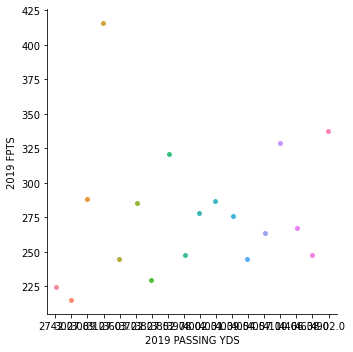

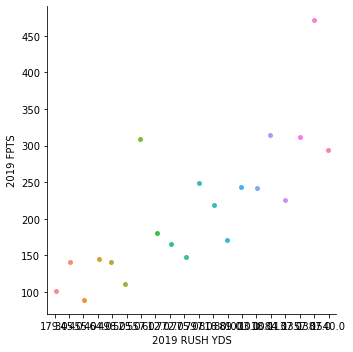

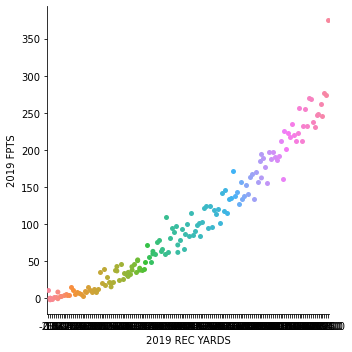

In [9]:
    #Scatterplot that does work
    
    sns.catplot(x='2019 PASSING YDS', y='2019 FPTS', data=qbclean)
    
    sns.catplot(x='2019 RUSH YDS', y='2019 FPTS', data=rbclean)
    
    sns.catplot(x='2019 REC YARDS', y='2019 FPTS', data=wrclean)


In [15]:
wrclean2019['2019 FPTS cat'] = np.where(wrclean2019['2019 FPTS'] >= wrclean2019["2019 FPTS"].mean(), "High", "Low")
rbclean2019['2019 FPTS cat'] = np.where(rbclean2019['2019 FPTS'] >= rbclean2019["2019 FPTS"].mean(), "High", "Low")
qbclean2019['2019 FPTS cat'] = np.where(qbclean2019['2019 FPTS'] >= qbclean2019["2019 FPTS"].mean(), "High", "Low")

/var/folders/6g/92qcylqn0w5ghd6z29sxcf_00000gn/T/ipykernel_78222/532722313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wrclean2019['2019 FPTS cat'] = np.where(wrclean2019['2019 FPTS'] >= wrclean2019["2019 FPTS"].mean(), "High", "Low")
/var/folders/6g/92qcylqn0w5ghd6z29sxcf_00000gn/T/ipykernel_78222/532722313.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rbclean2019['2019 FPTS cat'] = np.where(rbclean2019['2019 FPTS'] >= rbclean2019["2019 FPTS"].mean(), "High", "Low")
/var/folders/6g/92qcylqn0w

In [29]:
wrclean2020['2020 FPTS cat'] = np.where(wrclean2020['2020 FPTS'] >= wrclean2020["2020 FPTS"].mean(), "High", "Low")
rbclean2020['2020 FPTS cat'] = np.where(rbclean2020['2020 FPTS'] >= rbclean2020["2020 FPTS"].mean(), "High", "Low")
qbclean2020['2020 FPTS cat'] = np.where(qbclean2020['2020 FPTS'] >= qbclean2020["2020 FPTS"].mean(), "High", "Low")

/var/folders/6g/92qcylqn0w5ghd6z29sxcf_00000gn/T/ipykernel_78222/4102138619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wrclean2020['2020 FPTS cat'] = np.where(wrclean2020['2020 FPTS'] >= wrclean2020["2020 FPTS"].mean(), "High", "Low")
/var/folders/6g/92qcylqn0w5ghd6z29sxcf_00000gn/T/ipykernel_78222/4102138619.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rbclean2020['2020 FPTS cat'] = np.where(rbclean2020['2020 FPTS'] >= rbclean2020["2020 FPTS"].mean(), "High", "Low")
/var/folders/6g/92qcylqn

In [267]:
qbclean2020

,2020 COMPLETED PASS,2020 ATTEMPTED PASS,2020 PASSING YDS,2020 PASSING TD,2020 INT,2020 CAR,2020 RUSH YDS,2020 RUSH TD,2020 FPTS,2020 FPTS cat
0,296.0,465.0,3425.0,25.0,10.0,156.0,902.0,6.0,338.23,High
1,364.0,557.0,4465.0,32.0,10.0,61.0,280.0,3.0,332.66,High
2,337.0,517.0,4018.0,27.0,12.0,87.0,519.0,4.0,314.06,High
3,350.0,543.0,4280.0,27.0,11.0,49.0,248.0,4.0,301.71,High
4,300.0,473.0,3692.0,29.0,9.0,73.0,397.0,2.0,293.96,High
5,349.0,544.0,3819.0,26.0,12.0,87.0,469.0,3.0,293.94,High
6,361.0,575.0,4455.0,31.0,9.0,24.0,27.0,2.0,291.22,High
7,390.0,600.0,4533.0,28.0,12.0,32.0,125.0,1.0,282.50,High
9,337.0,527.0,3801.0,27.0,9.0,54.0,213.0,2.0,268.38,Low
11,291.0,483.0,3414.0,18.0,11.0,96.0,545.0,5.0,266.26,Low


In [205]:
def corplot(dataset):
    corr = dataset.corr()
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
    square=True, linewidths=.5, cbar_kws={"shrink": .5})
    

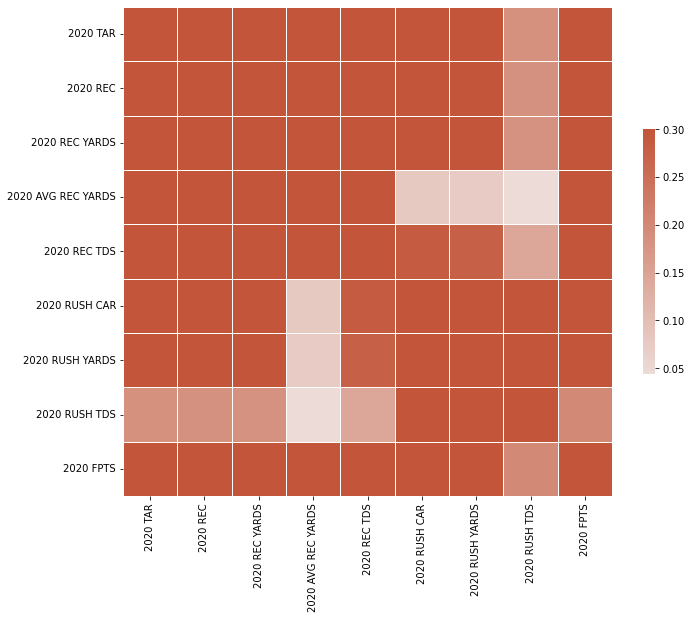

In [209]:
corplot(wrclean2020)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn import metrics

import seaborn as sn

In [20]:
## Logistic Regression

model = LogisticRegression(solver='liblinear', random_state=0)

In [271]:
X_trainwr = wrclean2019[['2019 TAR', '2019 REC','2019 REC YARDS','2019 AVG REC YARDS','2019 REC TDS','2019 RUSH CAR','2019 RUSH YARDS','2019 RUSH TDS']]
Y_trainwr = wrclean2019['2019 FPTS cat']
Y_ltrainwr = wrclean2019['2019 FPTS']

X_trainrb = rbclean2019[['2019 CAR', '2019 RUSH YDS','2019 RUSH AVG','2019 RUSH TD','2019 REC','2019 REC YDS','2019 REC TDS']]
Y_trainrb = rbclean2019['2019 FPTS cat']
Y_ltrainrb = rbclean2019['2019 FPTS']

X_trainqb = qbclean2019[['2019 COMPLETED PASS', '2019 ATTEMPTED PASS','2019 PASSING YDS','2019 PASSING TD', '2019 INT', '2019 CAR', '2019 RUSH YDS', '2019 RUSH TD']]
Y_trainqb = qbclean2019['2019 FPTS cat']
Y_ltrainqb = qbclean2019['2019 FPTS']


In [272]:
X_testwr = wrclean2020[['2020 TAR', '2020 REC','2020 REC YARDS','2020 AVG REC YARDS','2020 REC TDS','2020 RUSH CAR','2020 RUSH YARDS','2020 RUSH TDS']]
Y_testwr = wrclean2020['2020 FPTS cat']
Y_ltestwr = wrclean2020['2020 FPTS']

X_testrb = rbclean2020[['2020 CAR', '2020 RUSH YARDS','2020 RUSH AVG','2020 RUSH TD','2020 REC','2020 REC YDS','2020 REC TD']]
Y_testrb = rbclean2020['2020 FPTS cat']
Y_ltestrb = rbclean2020['2020 FPTS']

X_testqb = qbclean2020[['2020 COMPLETED PASS', '2020 ATTEMPTED PASS','2020 PASSING YDS','2020 PASSING TD', '2020 INT', '2020 CAR', '2020 RUSH YDS', '2020 RUSH TD']]
Y_testqb = qbclean2020['2020 FPTS cat']
Y_ltestqb = qbclean2020['2020 FPTS']

## Linear regression to predict actual FPTS value

Running back prediction: Follow array format below for inputs
X_newrb = '2020 CAR', '2020 RUSH YARDS','2020 RUSH AVG','2020 RUSH TD','2020 REC','2020 REC YDS','2020 REC TD'

Wide Reciever prediction: Follow array format below for inputs
'2020 TAR', '2020 REC','2020 REC YARDS','2020 AVG REC YARDS','2020 REC TDS','2020 RUSH CAR','2020 RUSH YARDS','2020 RUSH TDS'

Quarter Back prediction: Follow array format below for inputs
'2020 COMPLETED PASS', '2020 ATTEMPTED PASS','2020 PASSING YDS','2020 PASSING TD', '2020 INT', '2020 CAR', '2020 RUSH YDS', '2020 RUSH TD'

In [293]:
from sklearn.linear_model import LinearRegression

In [294]:
def linregpred(xtrain, ytrain, xnew, cleandata):
    reg = LinearRegression().fit(xtrain, ytrain)
    meanval = cleandata["2020 FPTS"].mean()
    if (reg.predict(xnew)>meanval):
        status = 'High'
    else:
        status = 'low'
    return reg.predict(xnew), status
    

In [296]:
X_newrb = [[286.0, 1356.0, 4.9, 11.0, 89.0, 1005.0, 3.0]]
X_newqb = [[300.0, 460.0, 3900.0, 20.0, 5.0, 40.0, 200.0, 2.0]]
# actual = 287
X_newwr = [[155.0, 104.0, 1165.0, 11.2, 7.0, 2.0, 18.0, 0.0]] 
# actual = 268

In [298]:
linregpred(X_trainrb, Y_ltrainrb, X_newrb, rbclean2020)

(array([405.96744946]), 'High')

In [299]:
linregpred(X_trainqb, Y_ltrainqb, X_newqb, qbclean2020)

(array([257.64849838]), 'low')

In [301]:
linregpred(X_trainwr, Y_ltrainwr, X_newwr, wrclean2020)

(array([265.34433066]), 'High')

## Logistic Regression

In [302]:
def Logisticreg(x_train, y_train, x_test, ytest):
    logistic_regression= LogisticRegression(solver='lbfgs', max_iter=500)
    logistic_regression.fit(x_train,y_train)
    y_pred=logistic_regression.predict(x_test)
    
    confusion_matrix = pd.crosstab(ytest, y_pred, rownames=['Actual'], colnames=['Predicted'])
    sn.heatmap(confusion_matrix, annot=True)
    count = 0
    y_pred = pd.DataFrame(y_pred)
    ytest = pd.DataFrame(ytest)
    if (len(ytest) == len(y_pred)):
        result = pd.concat([y_pred, ytest], axis=1, join='inner')
        result.columns = ['ypred', 'ytest']
        for i in result.iterrows():
            if (i[1][0] == i[1][1]):
                count = count+1
            
    return round(count/len(result),2)

0.82

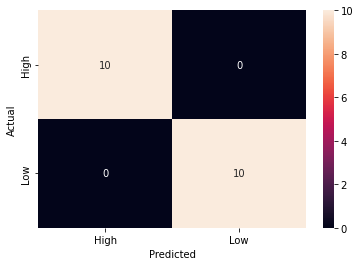

In [303]:
Logisticreg(X_trainrb, Y_trainrb, X_testrb, Y_testrb)

/Users/shakthivelganesan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.87

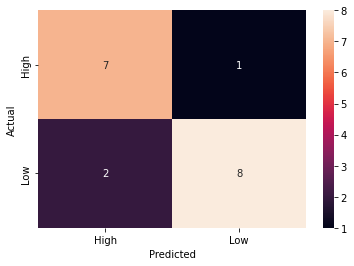

In [304]:
Logisticreg(X_trainqb, Y_trainqb, X_testqb, Y_testqb)

0.94

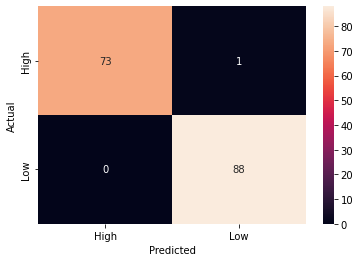

In [305]:
Logisticreg(X_trainwr, Y_trainwr, X_testwr, Y_testwr)

In [306]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score

## Quadratic Discriminant Analysis

In [307]:
def quaddisc(x_train, y_train, x_test, ytest):
    qda = QuadraticDiscriminantAnalysis()
    model2 = qda.fit(x_train, y_train)
    pred2=model2.predict(x_test)
    print(confusion_matrix(pred2, ytest))
    print(classification_report(ytest, pred2, digits=3))

In [308]:
quaddisc(X_trainrb, Y_trainrb, X_testrb, Y_testrb)

[[8 2]
 [2 8]]
              precision    recall  f1-score   support

        High      0.800     0.800     0.800        10
         Low      0.800     0.800     0.800        10

    accuracy                          0.800        20
   macro avg      0.800     0.800     0.800        20
weighted avg      0.800     0.800     0.800        20



In [309]:
quaddisc(X_trainqb, Y_trainqb, X_testqb, Y_testqb)

[[ 0  0]
 [ 8 10]]
              precision    recall  f1-score   support

        High      0.000     0.000     0.000         8
         Low      0.556     1.000     0.714        10

    accuracy                          0.556        18
   macro avg      0.278     0.500     0.357        18
weighted avg      0.309     0.556     0.397        18



/Users/shakthivelganesan/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/shakthivelganesan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shakthivelganesan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shakthivelganesan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Preci

In [310]:
quaddisc(X_trainwr, Y_trainwr, X_testwr, Y_testwr)

[[70  0]
 [ 4 88]]
              precision    recall  f1-score   support

        High      1.000     0.946     0.972        74
         Low      0.957     1.000     0.978        88

    accuracy                          0.975       162
   macro avg      0.978     0.973     0.975       162
weighted avg      0.976     0.975     0.975       162



## Support Vector Machine

In [311]:
from sklearn import svm

In [312]:
def supportvector(x_train, y_train, x_test, ytest):
    clf = svm.SVC()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    count = 0
    y_pred = pd.DataFrame(y_pred)
    ytest = pd.DataFrame(ytest)
    if (len(ytest) == len(y_pred)):
        result = pd.concat([y_pred, ytest], axis=1, join='inner')
        result.columns = ['ypred', 'ytest']
        for i in result.iterrows():
            if (i[1][0] == i[1][1]):
                count = count+1
            
    return round(count/len(result),2)
    

In [313]:
supportvector(X_trainrb, Y_trainrb, X_testrb, Y_testrb)

0.82

In [314]:
supportvector(X_trainqb, Y_trainqb, X_testqb, Y_testqb)

0.47

In [315]:
supportvector(X_trainwr, Y_trainwr, X_testwr, Y_testwr)

0.94

### SQL to pull specific player values